<a href="https://colab.research.google.com/github/Serge3leo/temp-cola/blob/main/ruSO/1616847-%D0%A4%D0%B8%D0%BE%D0%BB%D0%B5%D1%82%D0%BE%D0%B2%D0%BE-%D1%80%D0%BE%D0%B7%D0%BE%D0%B2%D1%8B%D0%B9/%20%D0%A4%D0%B8%D0%BE%D0%BB%D0%B5%D1%82%D0%BE%D0%B2%D0%BE-%D1%80%D0%BE%D0%B7%D0%BE%D0%B2%D1%8B%D0%B9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Техническое

Встроенные изображения от Pillow сравнительно тяжелые, а Github любит
лёгкие. Лично мне, способы оптимизации для Pillow неизвестны, так что
компактных встроенных изображения печатаем Matplotlib-ом.

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%config InlineBackend.print_figure_kwargs = {'pil_kwargs': {'optimize': True}}
%config InlineBackend.figure_formats = [ "jpeg" ]  # Режем для
mpl.rcParams['figure.dpi'] = 150

def gray_inline(img):
    fig, ax = plt.subplots()
    ax.imshow(img, cmap='gray')
    plt.show()

def rgb_inline(img):
    fig, ax = plt.subplots()
    ax.imshow(img)
    plt.show()

Кроме того, при открытии из Colab, нужно подгрузить с Github оригинальную картинку.

In [2]:
import os
try:
    import github
except ModuleNotFoundError:
    if 'google.colab' in str(get_ipython().config):
        %pip install -q PyGithub
    import github

token = os.environ.get('GITHUB_RO_TOKEN')  # Лучше rate limit
auth = github.Auth.Token(token) if token else None
g = github.Github(auth=auth)
print(f"{g.get_user()=}")

g.get_user()=AuthenticatedUser(login=None)


In [3]:
ipnb_owner, ipnb_repo, ipnb_cbt, ipnb_path, ipnb_files = (
    'Serge3leo', 'temp-cola', 'main',
    'ruSO/1616847-Фиолетово-розовый',
    ["Guerrillero Heroico.jpg"])

repo = g.get_repo(f"{ipnb_owner}/{ipnb_repo}")
for fn in ipnb_files:
    contents = repo.get_contents(f"{ipnb_path}/{fn}", ref=ipnb_cbt)
    with open(fn, "wb") as fo:
        fo.write(contents.decoded_content)

# Импорты

In [4]:
from collections import namedtuple
import numpy as np
from PIL import Image, ImageOps

# Героический партизан

В оригинале, был в "оттенках от чёрного до белого".

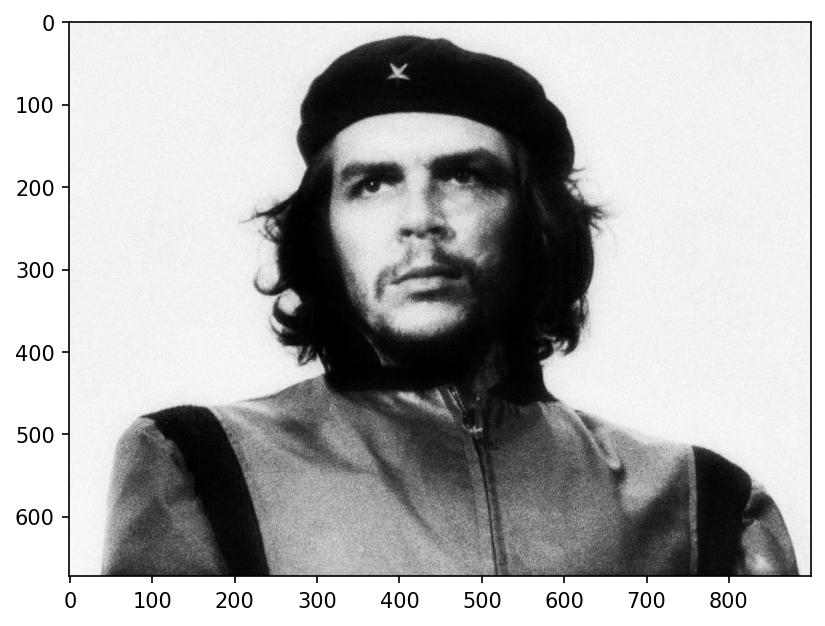

In [5]:
che = ImageOps.grayscale(Image.open("Guerrillero Heroico.jpg"))
gray_inline(che)

## Фиолетово-розовый (RGB)

Если во главу угла поставить "от фиолетового до розового".

In [6]:
violet = np.array((105, 0, 198))
pink = np.array((255, 192, 203))

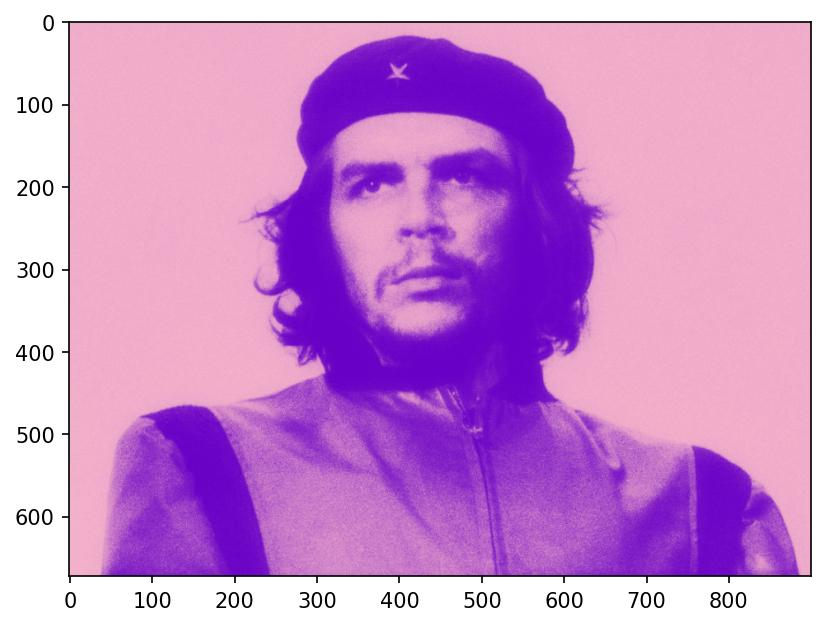

In [7]:
grey = np.asarray(che)
vpche = Image.fromarray(np.uint8(
            violet + np.einsum('ij,k', grey,
                               (pink - violet) / np.iinfo(grey[0, 0]).max)
            ))
rgb_inline(vpche)

## Градации фиолетового

Но, возможно. имелось ввиду так?

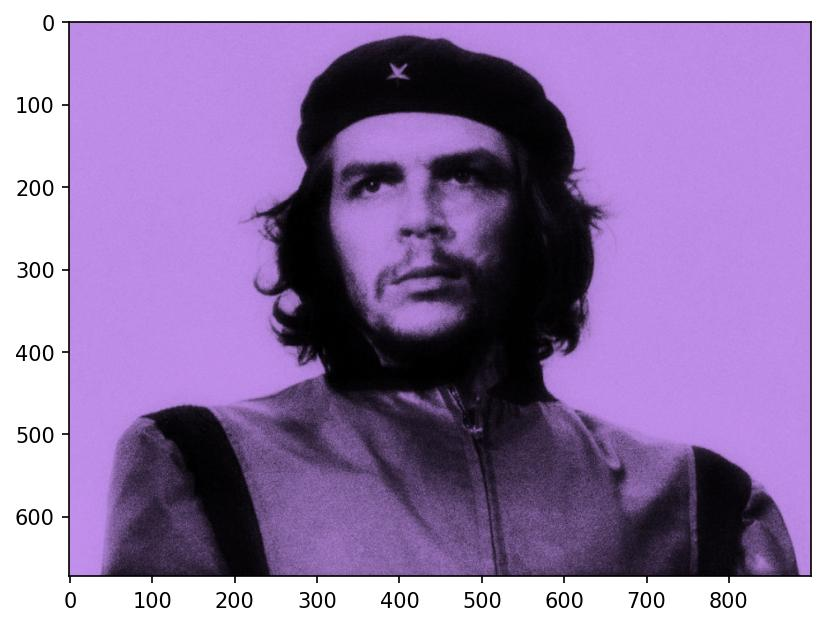

In [8]:
hsv = namedtuple('hsv', 'H S V')
hsv_violet = hsv(272., 100., 78.)

vche = Image.merge('HSV', (
            Image.fromarray(np.full(che.size[::-1], hsv_violet.H*256/360, np.uint8)),
            Image.fromarray(np.full(che.size[::-1], hsv_violet.S, np.uint8)),
            che
        )).convert('RGB')
rgb_inline(vche)

## Градации розового

Или так?

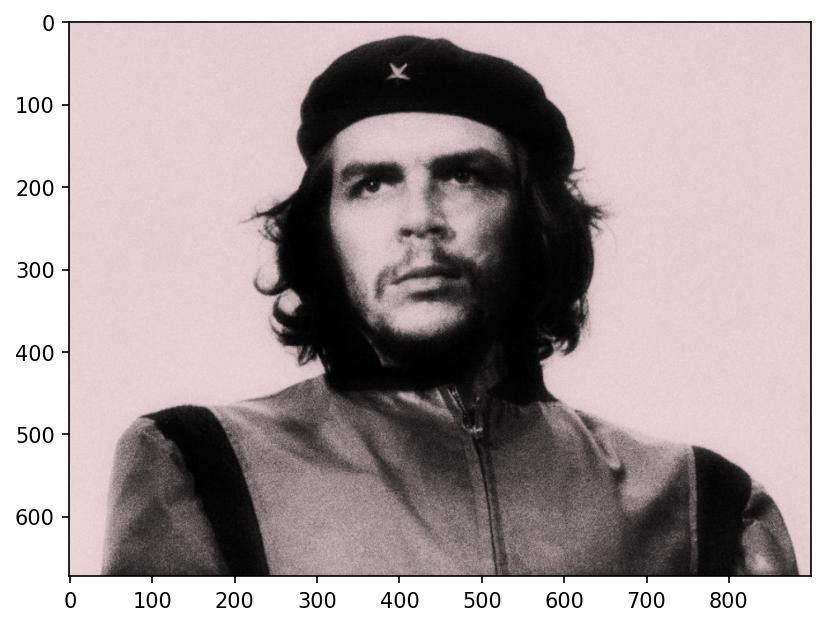

In [9]:
hsv_pink = hsv(350., 25., 100.)

vche = Image.merge('HSV', (
            Image.fromarray(np.full(che.size[::-1], hsv_pink.H*256/360, np.uint8)),
            Image.fromarray(np.full(che.size[::-1], hsv_pink.S, np.uint8)),
            che
        )).convert('RGB')
rgb_inline(vche)